# NYC Motor Vehicle Collisions Exploratory Data Analysis and Visualization

Author: Ragib Asif

## Libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import folium

## Data

In [3]:
csv_crashes = 'data/mvc_crashes.csv'
df = pd.read_csv(csv_crashes, low_memory=False)

In [4]:
print(df.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

In [5]:
print(df.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [6]:
print(df.info)

<bound method DataFrame.info of          CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        06/29/2022       6:55        NaN      NaN        NaN        NaN   
3        09/11/2021       9:35   BROOKLYN    11208  40.667202 -73.866500   
4        12/14/2021       8:13   BROOKLYN    11233  40.683304 -73.917274   
...             ...        ...        ...      ...        ...        ...   
2150961  01/20/2025      23:53        NaN      NaN  40.683544 -74.001760   
2150962  01/18/2025      20:00  MANHATTAN    10030  40.822030 -73.941800   
2150963  01/17/2025       5:44     QUEENS    11436  40.666430 -73.796660   
2150964  01/20/2025      13:10     QUEENS    11379  40.725010 -73.879196   
2150965  01/19/2025       1:44        NaN      NaN  40.630898 -74.139300   

                        LOCATION              ON STREET

In [14]:
print(df.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           666429
ZIP CODE                          666695
LATITUDE                          239592
LONGITUDE                         239592
LOCATION                          239592
ON STREET NAME                    462249
CROSS STREET NAME                 820224
OFF STREET NAME                  1781090
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7333
CONTRIBUTING FACTOR VEHICLE 2     339751
CONTRIBUTING FACTOR VEHICLE 3    1995976
CONTRIBUTING FACTOR VEHICLE 4    2115707
CONTRIBUTING FACTOR VEHICLE 5    2141339
COLLISION_ID                           0
VEHICLE TYPE COD

In [15]:
print(df.describe().T)

                                   count          mean           std  \
LATITUDE                       1911374.0  4.061889e+01  2.067521e+00   
LONGITUDE                      1911374.0 -7.373612e+01  3.871371e+00   
NUMBER OF PERSONS INJURED      2150948.0  3.199380e-01  7.083571e-01   
NUMBER OF PERSONS KILLED       2150935.0  1.543980e-03  4.146316e-02   
NUMBER OF PEDESTRIANS INJURED  2150966.0  5.823244e-02  2.474211e-01   
NUMBER OF PEDESTRIANS KILLED   2150966.0  7.657025e-04  2.822641e-02   
NUMBER OF CYCLIST INJURED      2150966.0  2.796650e-02  1.670089e-01   
NUMBER OF CYCLIST KILLED       2150966.0  1.199461e-04  1.099371e-02   
NUMBER OF MOTORIST INJURED     2150966.0  2.295071e-01  6.695248e-01   
NUMBER OF MOTORIST KILLED      2150966.0  6.299495e-04  2.746176e-02   
COLLISION_ID                   2150966.0  3.215471e+06  1.507187e+06   

                                     min           25%           50%  \
LATITUDE                         0.00000  4.066752e+01  4.07205

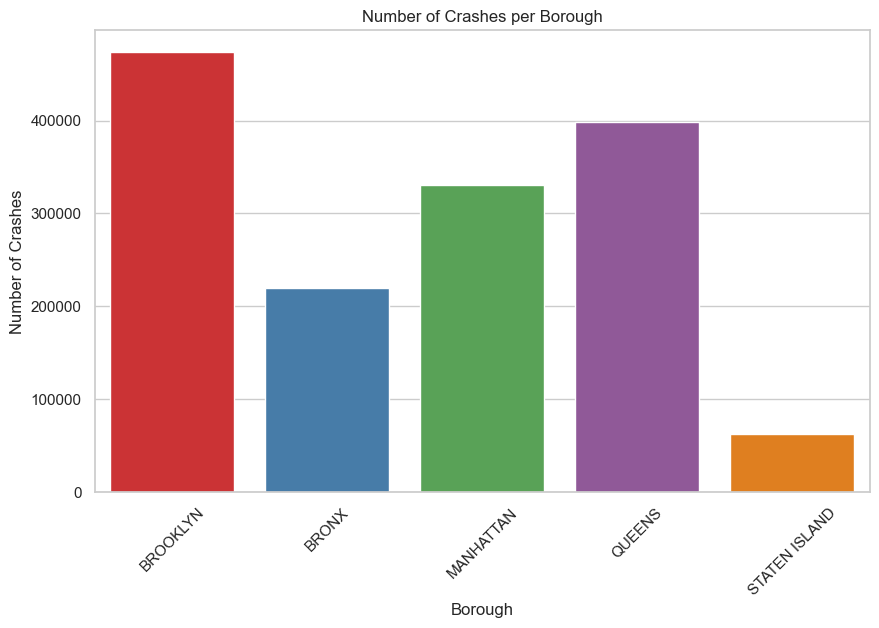

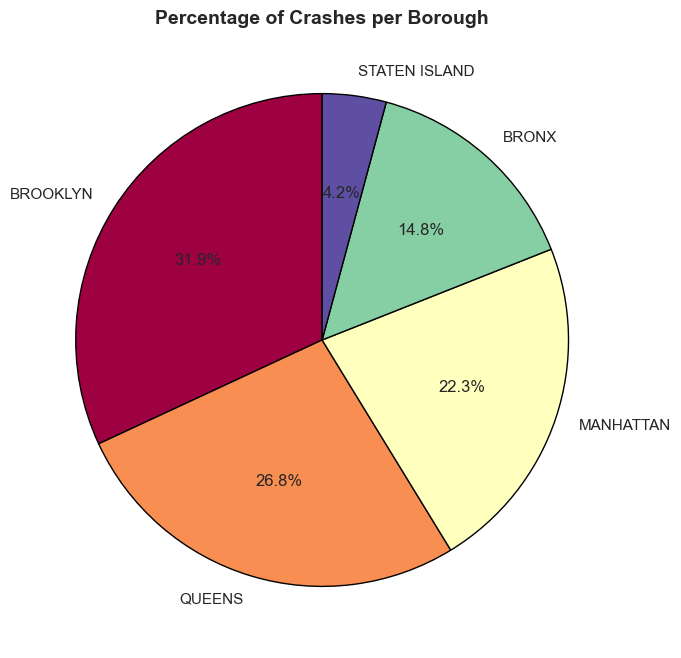

In [40]:
# Plot the number of crashes per borough
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sb.countplot(x='BOROUGH', data=df, palette="Set1", hue='BOROUGH')
plt.legend([], [], frameon=False)  # Remove the legend if unnecessary
plt.title('Number of Crashes per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 8))

df['BOROUGH'].value_counts().plot.pie(autopct="%1.1f%%", cmap="Spectral", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Percentage of Crashes per Borough", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

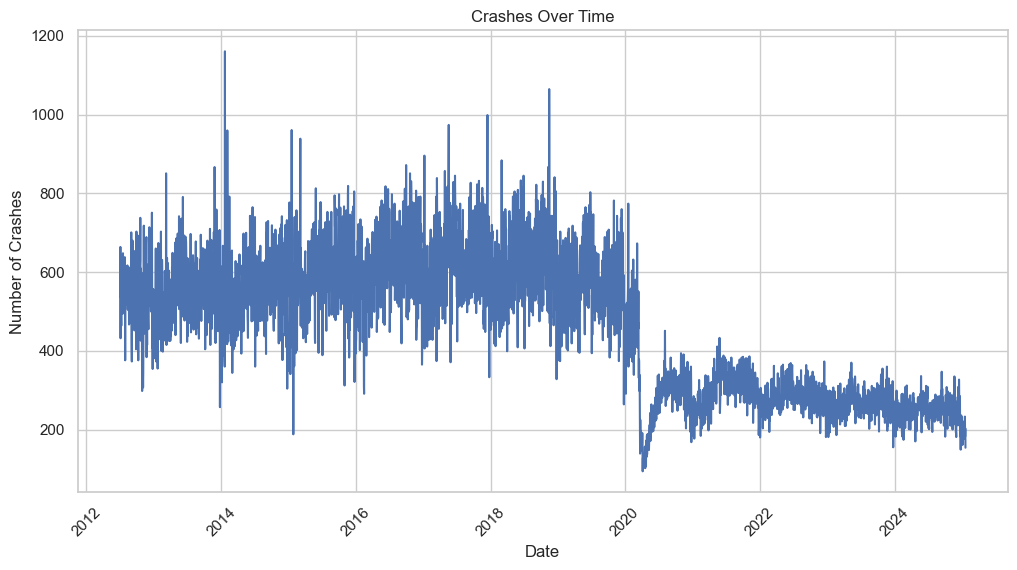

In [41]:
# Count the number of crashes per day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df_daily = df.groupby(df['CRASH DATE']).size().reset_index(name='CRASH COUNT')

# Plot crashes over time
plt.figure(figsize=(12, 6))
sb.lineplot(x='CRASH DATE', y='CRASH COUNT', data=df_daily)
plt.title('Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

In [42]:
print(df.head())

  CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2021-09-11       2:39       NaN      NaN        NaN        NaN   
1 2022-03-26      11:45       NaN      NaN        NaN        NaN   
2 2022-06-29       6:55       NaN      NaN        NaN        NaN   
3 2021-09-11       9:35  BROOKLYN    11208  40.667202 -73.866500   
4 2021-12-14       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1                   

In [9]:
# Get the first and last date
first_day = df['CRASH DATE'].min()
last_day = df['CRASH DATE'].max()

# Print the results
print(f"First Day: {first_day}")
print(f"Last Day: {last_day}")


First Day: 2012-07-01 00:00:00
Last Day: 2025-01-20 00:00:00


In [10]:
# Format the dates
first_day_formatted = first_day.strftime('%m/%d/%Y')
last_day_formatted = last_day.strftime('%m/%d/%Y')

print(f"First Day: {first_day_formatted}")
print(f"Last Day: {last_day_formatted}")


First Day: 07/01/2012
Last Day: 01/20/2025


<Axes: xlabel='BOROUGH', ylabel='count'>

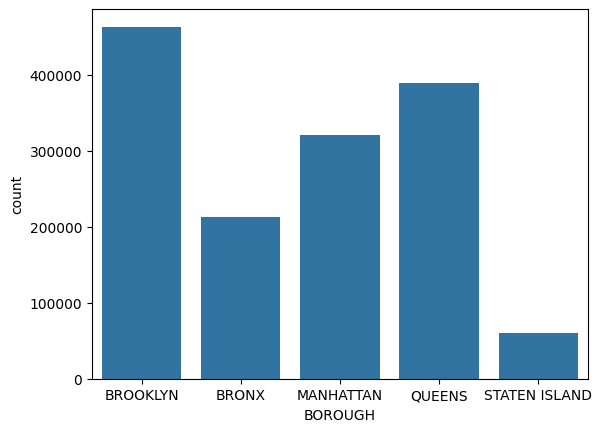

In [11]:
sb.countplot(data=df,x='BOROUGH')

In [12]:
# Get the total number of crashes (total rows in the DataFrame)
total_crashes = len(df)

print(f"Total number of crashes: {total_crashes}")


Total number of crashes: 1447042


<Axes: xlabel='BOROUGH', ylabel='Count'>

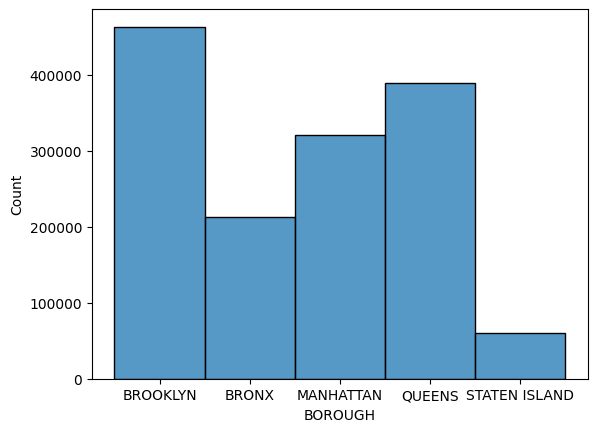

In [13]:
sb.histplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

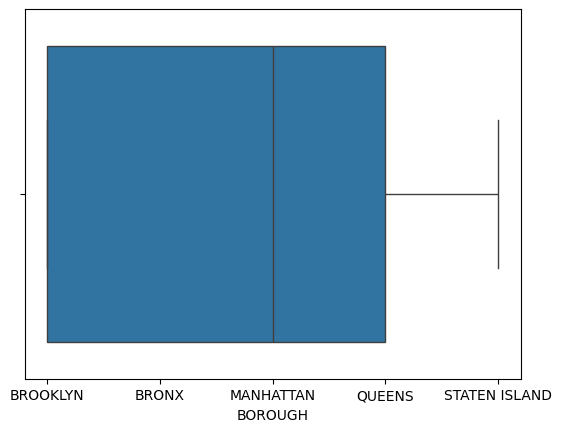

In [14]:
sb.boxplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

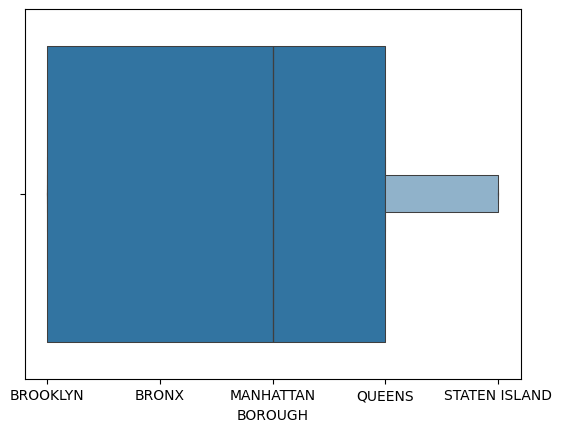

In [15]:
sb.boxenplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

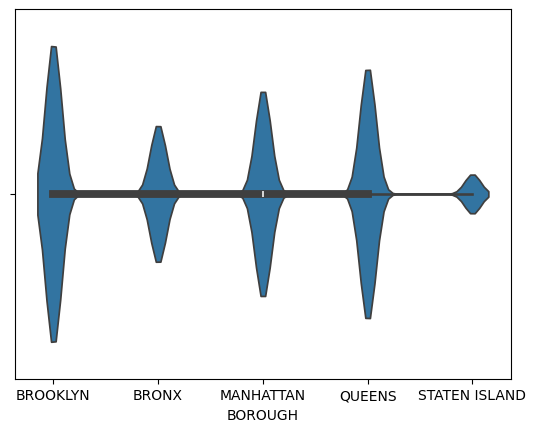

In [16]:
sb.violinplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH'>

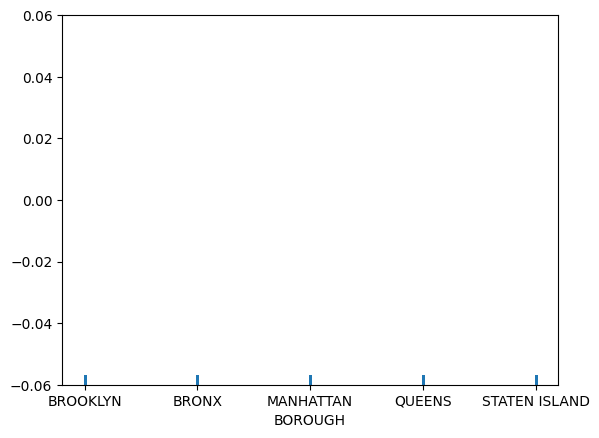

In [17]:
sb.rugplot(data=df,x='BOROUGH')

<Axes: xlabel='CRASH DATE', ylabel='Density'>

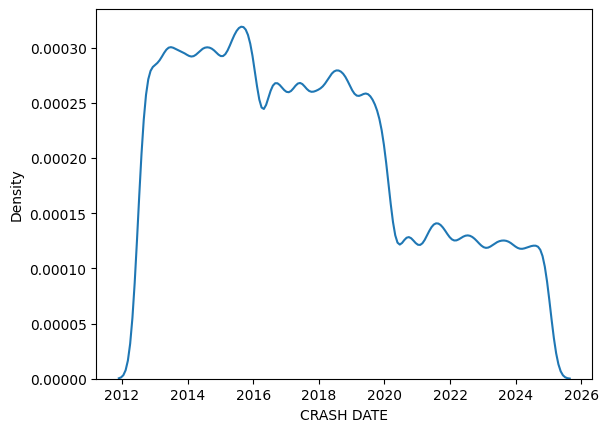

In [18]:
sb.kdeplot(data=df,x='CRASH DATE')

<Axes: xlabel='BOROUGH'>

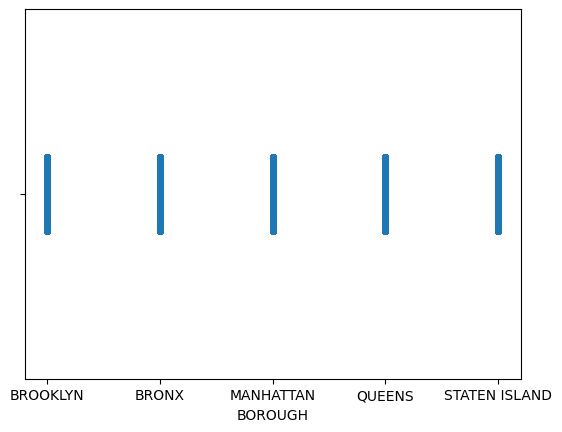

In [19]:
sb.stripplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='Proportion'>

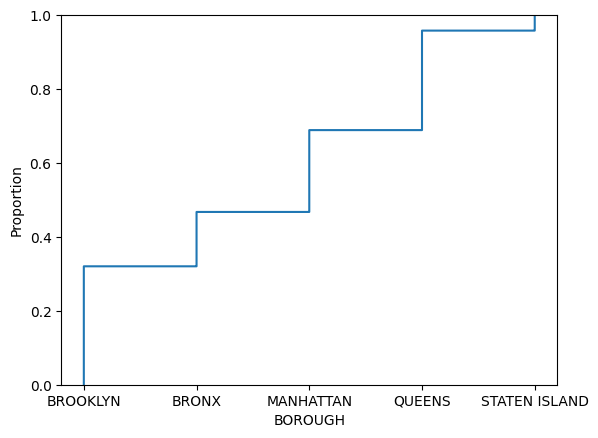

In [20]:
sb.ecdfplot(data=df,x='BOROUGH')

<Axes: xlabel='BOROUGH', ylabel='CRASH TIME'>

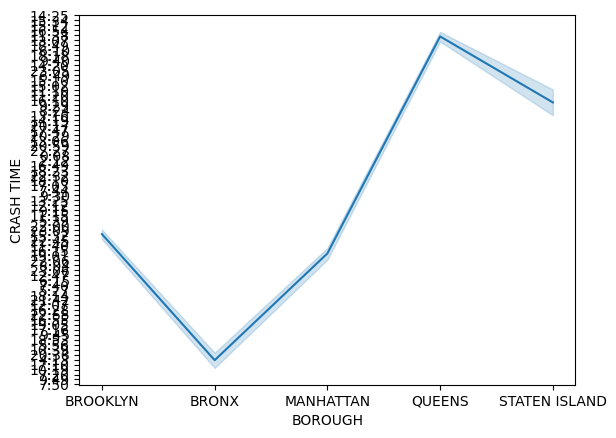

In [21]:
sb.lineplot(data=df,x='BOROUGH',y='CRASH TIME')

In [22]:

# Convert 'CRASH DATE' to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

# Convert 'CRASH TIME' to datetime and combine with 'CRASH DATE' for full datetime
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'], format='%Y-%m-%d %H:%M')

# Group by Year
df['YEAR'] = df['CRASH DATE'].dt.year
crash_count_by_year = df.groupby('YEAR').size().reset_index(name='CRASH COUNT')
crash_count_by_year.to_csv('data/clean/crash_count_by_year.csv', index=False)

# Group by Month
df['MONTH'] = df['CRASH DATE'].dt.month
crash_count_by_month = df.groupby('MONTH').size().reset_index(name='CRASH COUNT')
crash_count_by_month.to_csv('data/clean/crash_count_by_month.csv', index=False)

# Group by Hour
df['HOUR'] = df['CRASH DATETIME'].dt.hour
crash_count_by_hour = df.groupby('HOUR').size().reset_index(name='CRASH COUNT')
crash_count_by_hour.to_csv('data/clean/crash_count_by_hour.csv', index=False)


In [23]:
print(df.head())

  CRASH DATE CRASH TIME    BOROUGH                 LOCATION  COLLISION_ID  \
0 2021-09-11       9:35   BROOKLYN    (40.667202, -73.8665)       4456314   
1 2021-12-14       8:13   BROOKLYN  (40.683304, -73.917274)       4486609   
2 2021-12-14       8:17      BRONX    (40.86816, -73.83148)       4486660   
3 2021-12-14      21:10   BROOKLYN     (40.67172, -73.8971)       4487074   
4 2021-12-14      14:58  MANHATTAN    (40.75144, -73.97397)       4486519   

    LATITUDE  LONGITUDE      CRASH DATETIME  YEAR  MONTH  HOUR  
0  40.667202 -73.866500 2021-09-11 09:35:00  2021      9     9  
1  40.683304 -73.917274 2021-12-14 08:13:00  2021     12     8  
2  40.868160 -73.831480 2021-12-14 08:17:00  2021     12     8  
3  40.671720 -73.897100 2021-12-14 21:10:00  2021     12    21  
4  40.751440 -73.973970 2021-12-14 14:58:00  2021     12    14  


In [24]:
print(crash_count_by_hour)

    HOUR  CRASH COUNT
0      0        45057
1      1        24270
2      2        18870
3      3        16596
4      4        18384
5      5        19343
6      6        29251
7      7        41553
8      8        79618
9      9        77044
10    10        73036
11    11        76552
12    12        81682
13    13        85488
14    14        98065
15    15        90323
16    16       103913
17    17       101507
18    18        90097
19    19        74635
20    20        62787
21    21        52999
22    22        47518
23    23        38454


In [25]:
print(crash_count_by_month)

    MONTH  CRASH COUNT
0       1       116396
1       2       103537
2       3       111672
3       4        98418
4       5       120755
5       6       122102
6       7       131406
7       8       127790
8       9       128156
9      10       131639
10     11       126927
11     12       128244


In [26]:
print(crash_count_by_year)

    YEAR  CRASH COUNT
0   2012        77575
1   2013       155981
2   2014       156351
3   2015       163453
4   2016       136902
5   2017       138519
6   2018       144807
7   2019       133092
8   2020        71634
9   2021        70092
10  2022        66649
11  2023        64531
12  2024        64390
13  2025         3066


<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

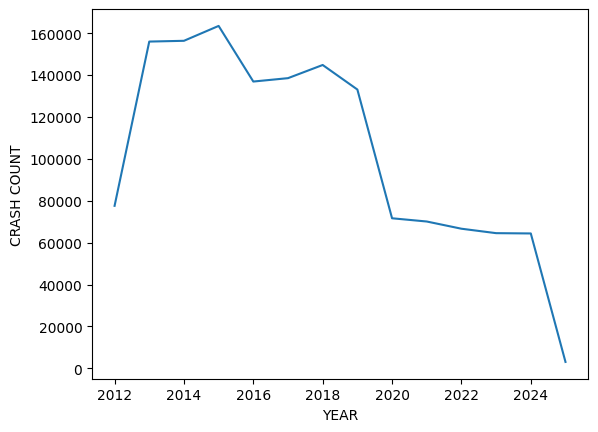

In [27]:
sb.lineplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT')

<Axes: xlabel='MONTH', ylabel='CRASH COUNT'>

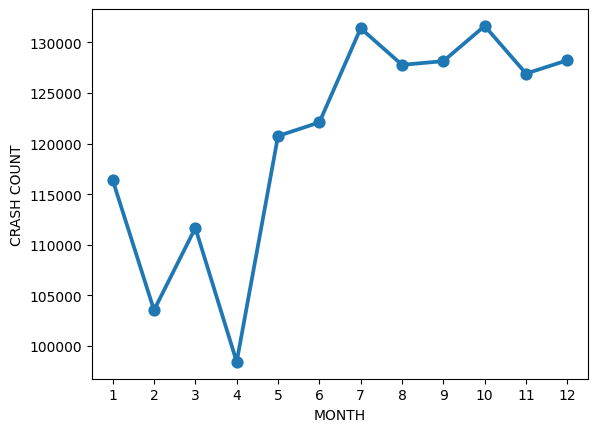

In [28]:
sb.pointplot(data=crash_count_by_month,x='MONTH',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

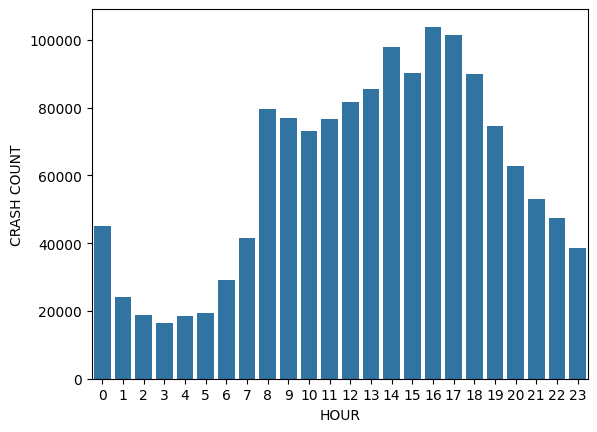

In [29]:
sb.barplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

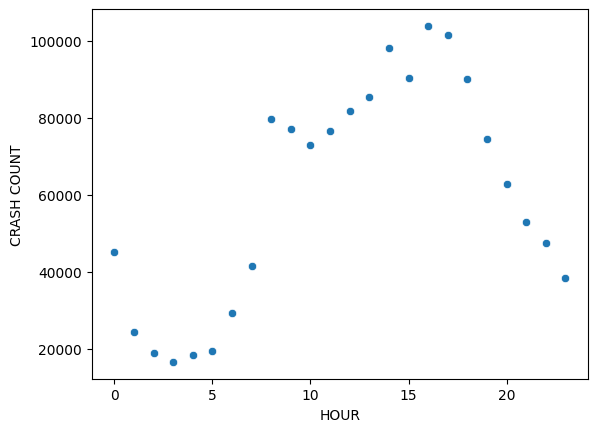

In [30]:
sb.scatterplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

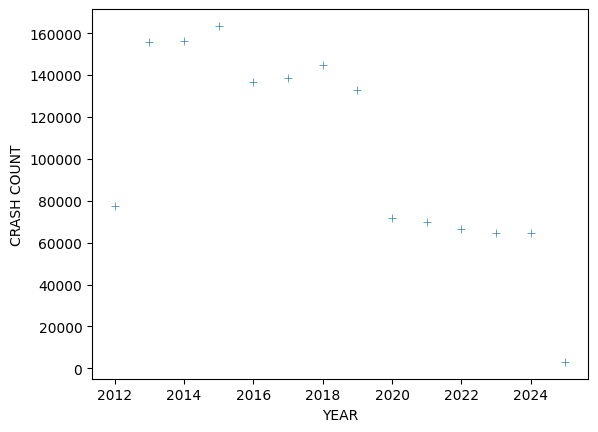

In [31]:
sb.scatterplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT', marker='+')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

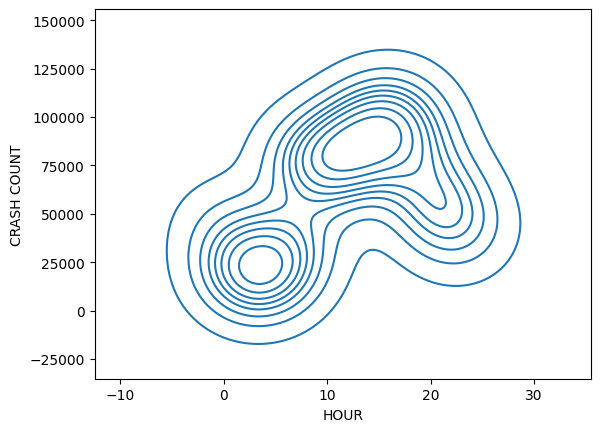

In [32]:
sb.kdeplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

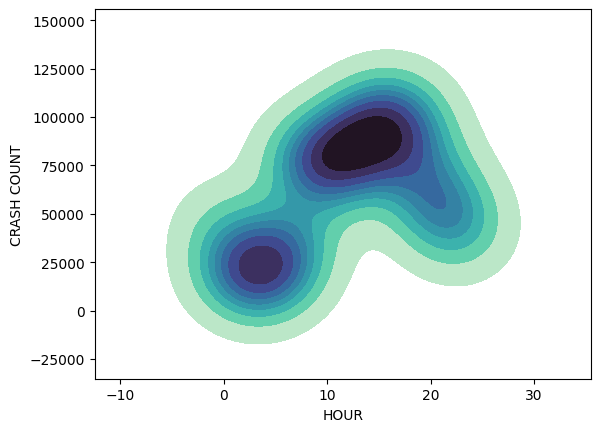

In [33]:
sb.kdeplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT',fill=True,cmap='mako_r')

<Axes: xlabel='HOUR', ylabel='CRASH COUNT'>

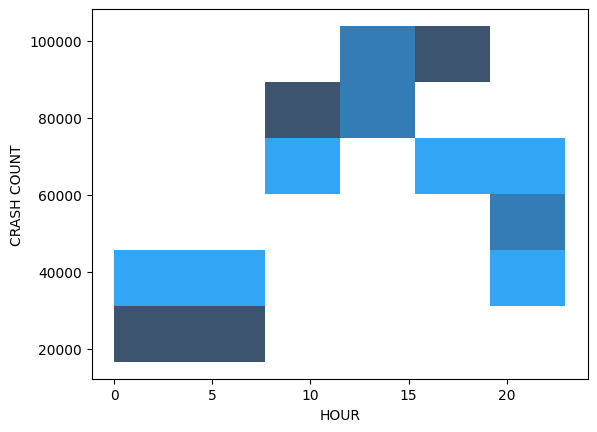

In [34]:
sb.histplot(data=crash_count_by_hour,x='HOUR',y='CRASH COUNT')

<Axes: xlabel='YEAR', ylabel='CRASH COUNT'>

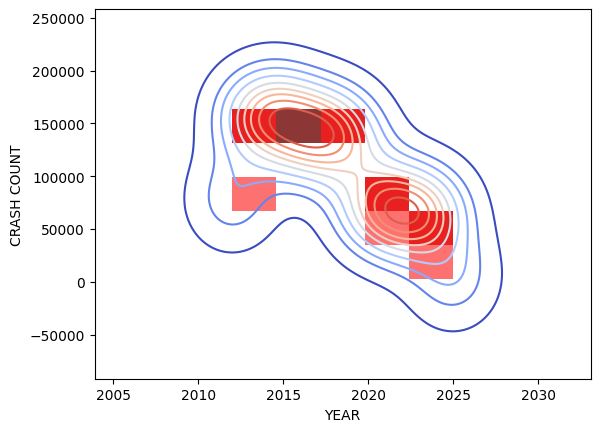

In [35]:
sb.kdeplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT',cmap='coolwarm')
sb.histplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT', color='red')

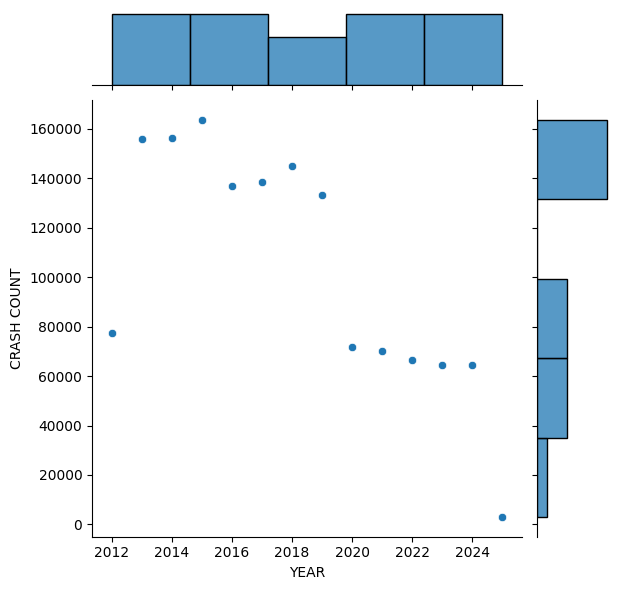

In [36]:
sb.jointplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT')

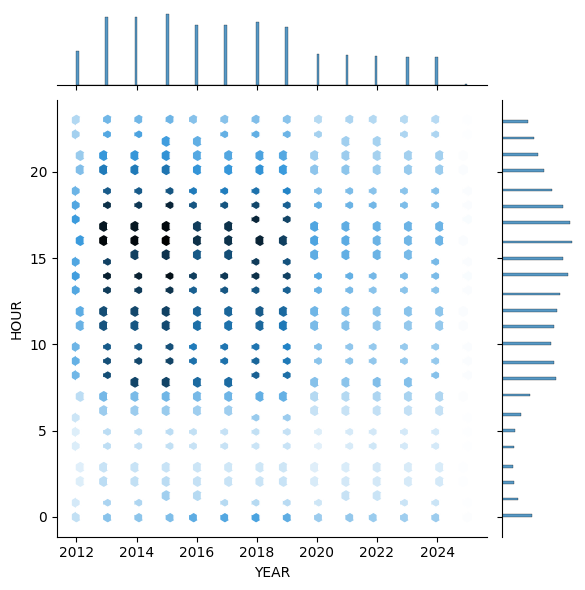

In [37]:
sb.jointplot(data=df,x='YEAR',y='HOUR',kind='hex')

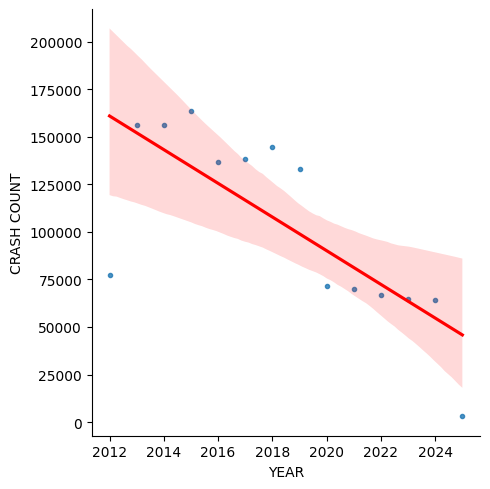

In [38]:
sb.lmplot(data=crash_count_by_year,x='YEAR',y='CRASH COUNT',markers=".",line_kws={'color': 'red'})

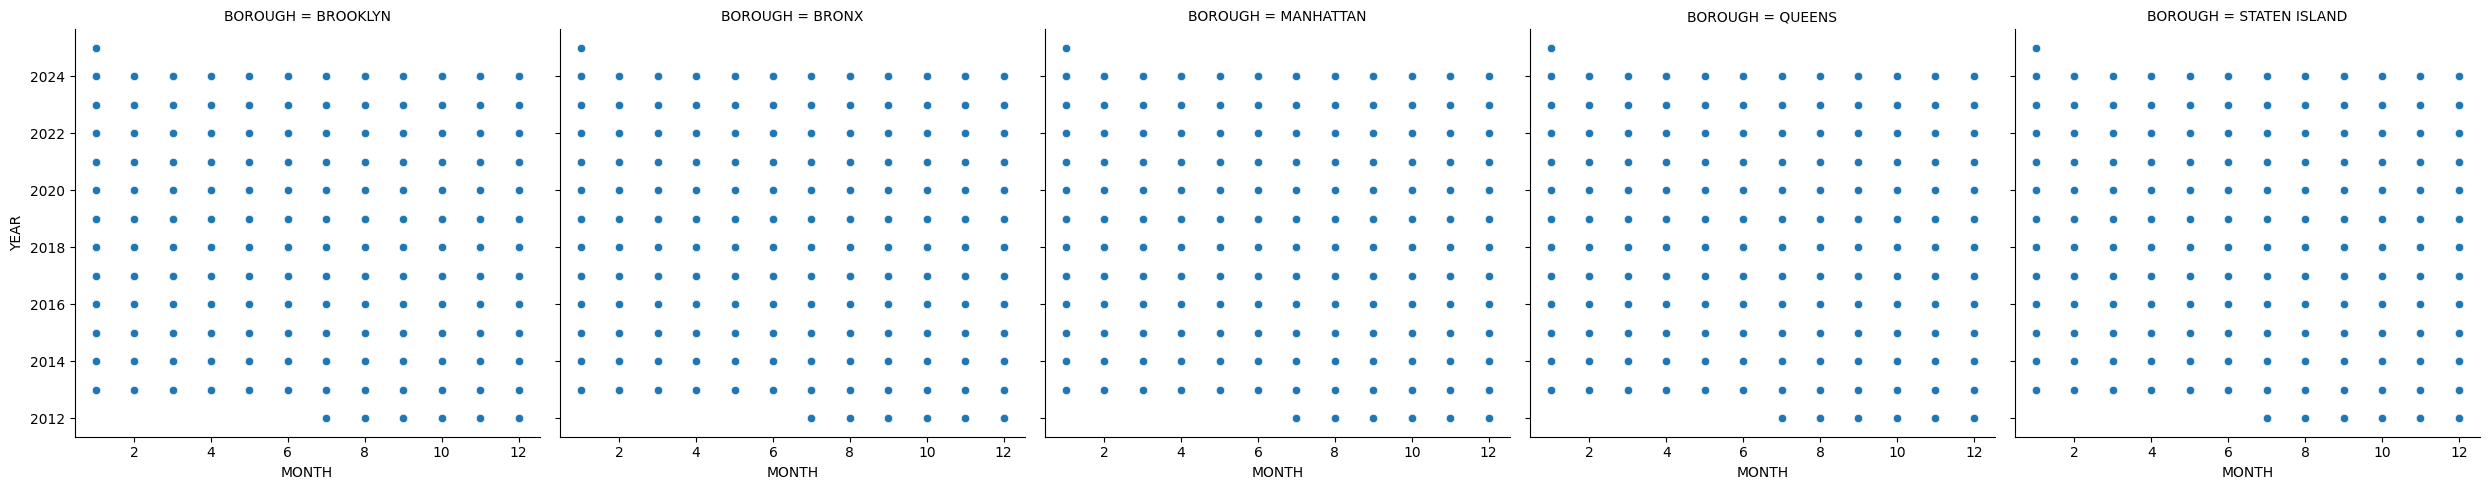

In [39]:
sb.relplot(data=df,x='MONTH',y='YEAR',col='BOROUGH')

<Axes: >

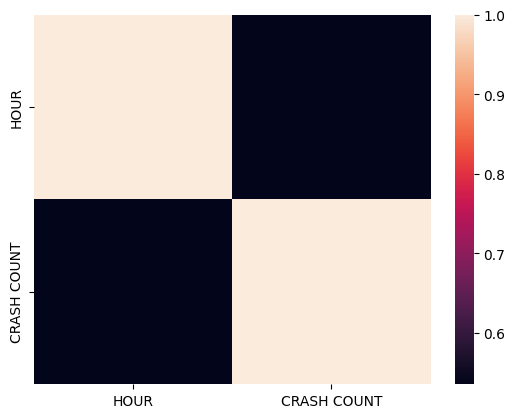

In [40]:
sb.heatmap(crash_count_by_hour.corr())

<Axes: >

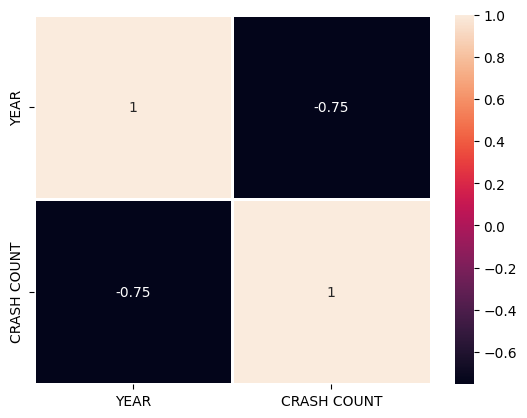

In [41]:
sb.heatmap(crash_count_by_year.corr(),annot=True,linewidths=1)

In [42]:
borough_data = df.groupby('BOROUGH').size().reset_index(name='CRASH COUNT')
print(borough_data.head())

         BOROUGH  CRASH COUNT
0          BRONX       212823
1       BROOKLYN       463616
2      MANHATTAN       320430
3         QUEENS       389551
4  STATEN ISLAND        60622


<Axes: title={'center': 'Crashes Over Time'}>

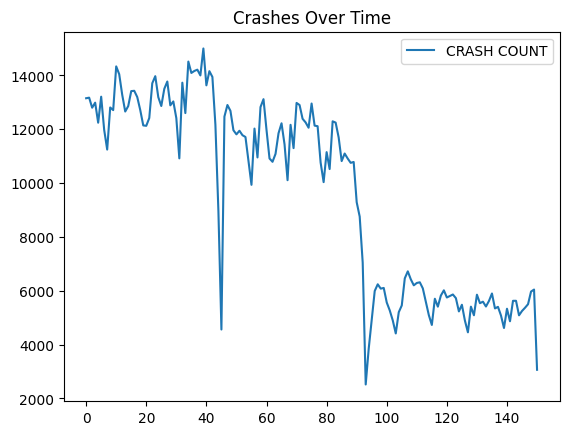

In [43]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
crashes_per_month = df.groupby(df['CRASH DATE'].dt.to_period('M')).size().reset_index(name='CRASH COUNT')
crashes_per_month.plot(kind='line', title='Crashes Over Time')

<Axes: title={'center': 'Crashes by Day of the Week'}>

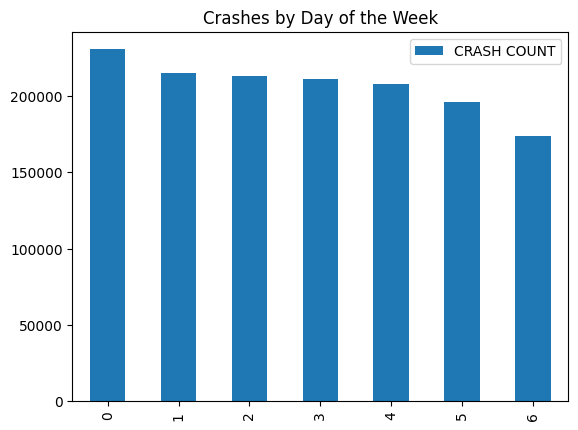

In [44]:
df['WEEKDAY'] = df['CRASH DATE'].dt.day_name()
crashes_per_day = df['WEEKDAY'].value_counts().reset_index(name='CRASH COUNT')
crashes_per_day.plot(kind='bar', title='Crashes by Day of the Week')

In [38]:
print(crashes_per_day)
plt.figure(figsize=(10, 5))
sb.countplot(x=df['WEEKDAY'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

NameError: name 'crashes_per_day' is not defined

In [46]:
print(crashes_per_month.head())

  CRASH DATE  CRASH COUNT
0    2012-07        13153
1    2012-08        13175
2    2012-09        12802
3    2012-10        12989
4    2012-11        12245


<Axes: xlabel='HOUR', ylabel='WEEKDAY'>

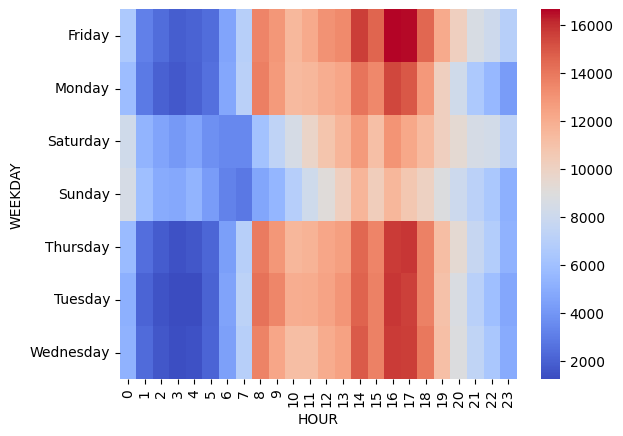

In [47]:
#df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour
heatmap_data = df.groupby(['WEEKDAY', 'HOUR']).size().unstack()
sb.heatmap(heatmap_data, cmap='coolwarm', annot=False)


In [53]:
top_locations = df['LOCATION'].value_counts().head(1001).tail(1000).reset_index()
top_locations.columns = ['LOCATION', 'CRASH COUNT']
top_locations[['LATITUDE', 'LONGITUDE']] = top_locations['LOCATION'].str.extract(r'\((.*), (.*)\)').astype(float)
print(top_locations)

                      LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0    (40.6960346, -73.9845292)          587  40.696035 -73.984529
1       (40.696033, -73.98453)          523  40.696033 -73.984530
2       (40.861862, -73.91282)          478  40.861862 -73.912820
3    (40.7606005, -73.9643142)          474  40.760601 -73.964314
4    (40.7572323, -73.9897922)          456  40.757232 -73.989792
..                         ...          ...        ...        ...
995      (40.73329, -73.98719)          104  40.733290 -73.987190
996  (40.6523139, -73.9560111)          104  40.652314 -73.956011
997  (40.8777986, -73.8680486)          104  40.877799 -73.868049
998     (40.700592, -73.85457)          104  40.700592 -73.854570
999     (40.654705, -74.00731)          104  40.654705 -74.007310

[1000 rows x 4 columns]


In [54]:
import folium

In [55]:
map_center = [40.7128, -74.0060]  # NYC center coordinates
crash_map = folium.Map(location=map_center, zoom_start=12)

# Step 5: Add markers for the top 10 locations
for _, row in top_locations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Location: {row['LOCATION']}<br>Crash Count: {row['CRASH COUNT']}",
        tooltip=f"{row['CRASH COUNT']} crashes",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(crash_map)

# Step 6: Save the map
crash_map.save('top_10_crash_locations.html')
crash_map

In [51]:
locations = df['LOCATION'].value_counts().reset_index()
locations.columns = ['LOCATION', 'CRASH COUNT']
locations[['LATITUDE', 'LONGITUDE']] = top_locations['LOCATION'].str.extract(r'\((.*), (.*)\)').astype(float)
print(len(locations), '\n\n',locations.head(),'\n',locations.dropna(), '\n', locations)

275388 

                     LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0                 (0.0, 0.0)         3760  40.696035 -73.984529
1  (40.6960346, -73.9845292)          587  40.696033 -73.984530
2     (40.696033, -73.98453)          523  40.861862 -73.912820
3     (40.861862, -73.91282)          478  40.760601 -73.964314
4  (40.7606005, -73.9643142)          474  40.757232 -73.989792 
                      LOCATION  CRASH COUNT   LATITUDE  LONGITUDE
0                  (0.0, 0.0)         3760  40.696035 -73.984529
1   (40.6960346, -73.9845292)          587  40.696033 -73.984530
2      (40.696033, -73.98453)          523  40.861862 -73.912820
3      (40.861862, -73.91282)          478  40.760601 -73.964314
4   (40.7606005, -73.9643142)          474  40.757232 -73.989792
..                        ...          ...        ...        ...
95  (40.7629663, -73.9739693)          237  40.746033 -73.934410
96     (40.746033, -73.93441)          237  40.742910 -73.992804
97  (40.7429104, -7

In [72]:
data = 'data/mvc_crashes.csv'
df = pd.read_csv(data, low_memory=False)
print("\n")
print("df.head()\n", df.head())
print("\n")
print("df.dtypes\n", df.dtypes)



df.head()
    CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1

In [76]:
# Basic information about the dataset
df.info()
df.isnull().sum()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150966 entries, 0 to 2150965
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

2150966

In [75]:
# Summary statistics
df.describe()

# Check for missing values
df.duplicated().sum()

# Drop duplicates if any
df = df.drop_duplicates()

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150966 entries, 0 to 2150965
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO